In [1]:
from pathlib import Path
import csv
from datetime import datetime
import matplotlib.pyplot as plt

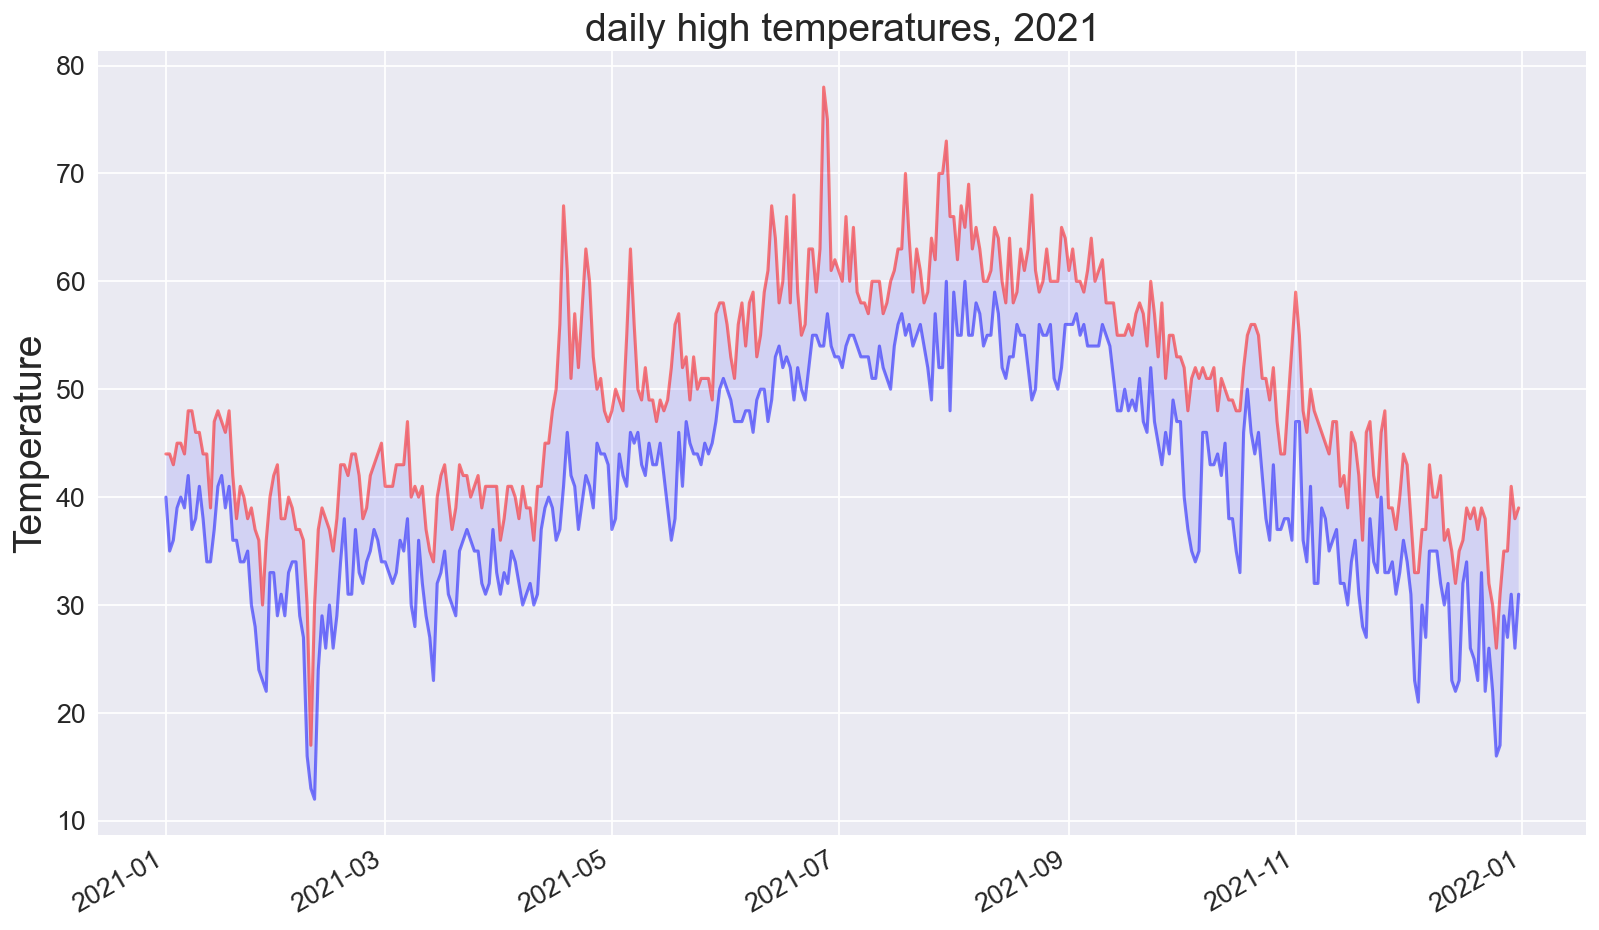

In [2]:
path = Path('data/weather_data/sitka_weather_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

dates, highs, lows = [], [], []
# 按行读出每行的第下标为4的值,即为最高气温
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    try:
        high = int(row[4])
        low = int(row[5])
    except ValueError:
        print(f'Missing data for {current_date}')
    else:
        dates.append(current_date)
        highs.append(high)
        lows.append(low)
    
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 9), dpi=128)
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)

ax.fill_between(dates, highs, lows, facecolor="blue", alpha=0.1)

ax.set_title("daily high temperatures, 2021", fontsize=22)
ax.set_xlabel("", fontsize=16)
ax.set_ylabel("Temperature", fontsize=22)
ax.tick_params(labelsize=15)
fig.autofmt_xdate()
plt.show()